In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture
import tqdm

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'AMP'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/AMP_Database.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/fame_mix/on/'
Project_results = Project + Project_Name + '/results/fame_mix/'
file_name_to_save = 'AMP'
tolerance = 0.8
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/fame_mix/on/
Project_results: ./Projects/AMP/results/fame_mix/
file_name_to_save: AMP
tolerance: 0.8
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/AMP/fame_mix/on/11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3on_01.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)

,Parent_Ion,Product_Ion,Intensity,Transition,Sample_ID,Lipid,Class
0,255.2,183.0,4.901610e+04,255.2 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,4:0 / 12:1n-9 / ... / 18:1n-15,FA
1,269.1,183.0,3.537842e+05,269.1 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",FA
2,283.1,183.0,7.813664e+05,283.1 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",FA
3,283.3,183.0,8.790951e+05,283.3 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",FA
4,297.2,183.0,4.918833e+05,297.2 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"18:3 (6Z,9Z,12Z))n-6,n-9,n-12 / 12:1n-6 ... / ...",FA
5,309.1,183.0,8.642294e+05,309.1 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n-15",FA
6,311.3,183.0,1.572422e+05,311.3 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,8:0 / 12:1n-5 / ... / 18:1n-11,FA
7,323.2,183.0,1.845983e+06,323.2 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12 / 20:...",FA
8,325.2,183.0,1.126034e+06,325.2 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"20:3 (8Z,11Z,14Z)n-6,n-9,n-12 / 12:1n-4 / 13:1...",FA
9,337.2,183.0,9.576161e+05,337.2 -> 183.0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,"18:3 (6Z,9Z,12Z))n-6,n-9",FA


In [9]:
df_OzESI

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,255.2,183.0,0.024400,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
1,NaN,255.2,183.0,0.050617,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
2,NaN,255.2,183.0,0.076850,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
3,NaN,255.2,183.0,0.103083,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
4,NaN,255.2,183.0,0.129317,54.620003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
...,...,...,...,...,...,...,...
50900,NaN,533.5,183.0,24.606100,41.800003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50901,NaN,533.5,183.0,24.632333,41.280003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50902,NaN,533.5,183.0,24.658567,41.280003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50903,NaN,533.5,183.0,24.684800,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0


# CLASSES for data analysis

# CLASS Parse, match lipids, add parameter columns from sample_ID, 

In [10]:
import pandas as pd

class RawDataParser:
    def __init__(self, df_MRM, df_OzESI):
        self.df_MRM = df_MRM
        self.df_OzESI = df_OzESI
    
    def create_match_group(self, df):
        df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        return df
    
    def filter_retention_time(self, df, retention_time_range):
        df_filtered = df[(df['Retention_Time'] >= retention_time_range[0]) & (df['Retention_Time'] <= retention_time_range[1])]
        return df_filtered
    
    def is_within_tolerance(self, ion1, ion2, tolerance=0.3):
        return abs(ion1 - ion2) <= tolerance
    
    def match_lipids(self, d1a, d1b):
        if 'Match_Group' not in d1a.columns:
            d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        
        d1b['Match_Group'] = d1a['Match_Group']
        d1b['Lipid'] = None
        
        for group in d1a['Match_Group'].unique():
            group_row = d1a[d1a['Match_Group'] == group].iloc[0]
            
            for _, mrm_row in self.df_MRM.iterrows():
                if self.is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and self.is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
                    d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
                    break
        
        return d1b
    
    def extract_details_from_sample_id(self, df, column_name='Sample_ID', new_columns=None):
        if new_columns is None or not isinstance(new_columns, dict):
            raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")
        
        for col, values in new_columns.items():
            pattern = f"(?P<{col}>{'|'.join(values)})"
            df_extracted = df[column_name].str.extract(pattern)
            df = pd.concat([df, df_extracted[[col]]], axis=1)
        
        return df
   
    def extract_fac_values(self, df):
        def extract_fac(lipid):
            if pd.isna(lipid):
                return []
            return re.findall(r'\d+:\d+', lipid)
        
        df['FAC'] = df['Lipid'].apply(extract_fac)
        return df
    
    def group(self, df, group_columns=None):
        if group_columns is None:
            group_columns = ['Lipid', 'Sample_ID']
        
        if not isinstance(group_columns, list):
            raise ValueError("group_columns must be a list of column names")
        
        invalid_columns = set(group_columns) - set(df.columns)
        if invalid_columns:
            raise ValueError(f"The following columns are not present in the DataFrame: {', '.join(invalid_columns)}")
        
        df['Group_Sample'] = df.groupby(group_columns).ngroup()
        return df
    
    def parse_data(self, retention_time_range, new_columns, group_columns=None):
        self.df_MRM = self.create_match_group(self.df_MRM)
        
        d1 = self.df_OzESI.iloc[:, 1:9]
        d1a = self.filter_retention_time(d1, retention_time_range)
        d1a = self.create_match_group(d1a)
        
        d1b = d1a.copy()
        d1b = self.match_lipids(d1a, d1b)
        
        d1c = d1b.copy()
        d1c = self.extract_details_from_sample_id(d1c, new_columns=new_columns)
        d1c = self.extract_fac_values(d1c)
        
        d1d = d1c.copy()
        d1d = self.group(d1d, group_columns)
        
        return d1d
    
    def plot_full_spectrum(self, d1a):
        plt.figure(figsize=(10, 6))
        plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.title('Retention Time vs OzESI Intensity')
        plt.show()

In [11]:
parser = RawDataParser(df_MRM, df_OzESI)
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD245', 'FAD249', 'FAD257', 'FAD263'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology']

#group columns of STANDARDS
group_columns = ['Lipid']

# Parse the data
parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns)

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


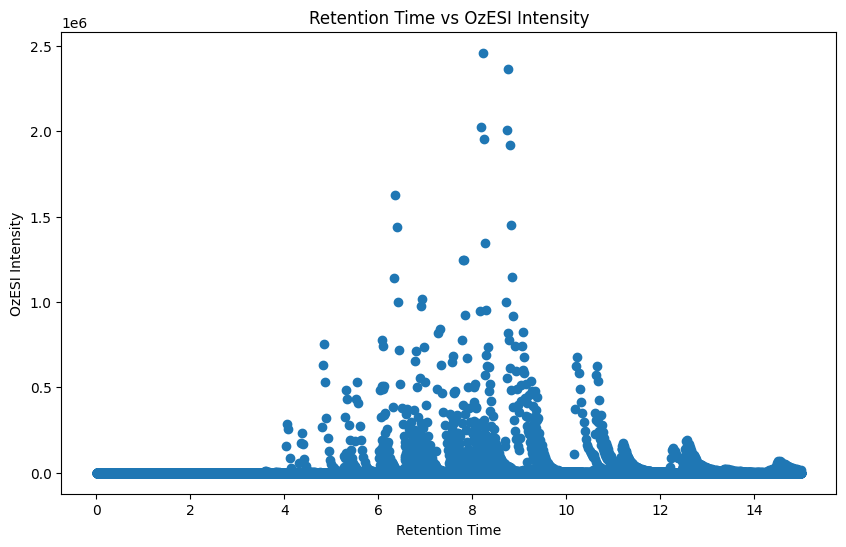

In [12]:
# Plot the full spectrum
parser.plot_full_spectrum(parsed_data)

In [13]:
parsed_data

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,FAC,Group_Sample
0,255.2,183.0,0.024400,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0 / 12:1n-9 / ... / 18:1n-15,NaN,NaN,NaN,NaN,"[4:0, 12:1, 18:1]",47
1,255.2,183.0,0.050617,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0 / 12:1n-9 / ... / 18:1n-15,NaN,NaN,NaN,NaN,"[4:0, 12:1, 18:1]",47
2,255.2,183.0,0.076850,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0 / 12:1n-9 / ... / 18:1n-15,NaN,NaN,NaN,NaN,"[4:0, 12:1, 18:1]",47
3,255.2,183.0,0.103083,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0 / 12:1n-9 / ... / 18:1n-15,NaN,NaN,NaN,NaN,"[4:0, 12:1, 18:1]",47
4,255.2,183.0,0.129317,54.620003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0 / 12:1n-9 / ... / 18:1n-15,NaN,NaN,NaN,NaN,"[4:0, 12:1, 18:1]",47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50529,533.5,183.0,14.873600,41.420002,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1 | dummy,NaN,NaN,NaN,NaN,[24:1],46
50530,533.5,183.0,14.899833,41.380001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1 | dummy,NaN,NaN,NaN,NaN,[24:1],46
50531,533.5,183.0,14.926067,41.340004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1 | dummy,NaN,NaN,NaN,NaN,[24:1],46
50532,533.5,183.0,14.952300,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1 | dummy,NaN,NaN,NaN,NaN,[24:1],46


# CLASS Peak analysis

In [14]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks

# class PeakAnalysis:
#     def __init__(self, data):
#         if isinstance(data, pd.DataFrame):
#             self.data = data
#         else:
#             raise ValueError("Input data must be a pandas DataFrame")

#     def plot_peaks_before(self, match_group, figsize=(10, 6)):
#         subset = self.data[self.data['Group_Sample'] == match_group]
#         if subset.empty:
#             print(f"No data found for Match Group {match_group}")
#             return

#         # Extract additional details from the first entry
#         lipid = subset['Lipid'].iloc[0]
#         biology = subset['Biology'].iloc[0]
#         genotype = subset['Genotype'].iloc[0]
#         cage = subset['Cage'].iloc[0]
#         mouse = subset['Mouse'].iloc[0]

#         plt.figure(figsize=figsize)
#         plt.scatter(subset['Retention_Time'], subset['OzESI_Intensity'], color='blue', label='Intensity Data Points')
#         plt.plot(subset['Retention_Time'], subset['OzESI_Intensity'], label='Intensity Profile', alpha=0.6)
#         title = f' Group {match_group}: {lipid}, {biology}, {genotype}, {cage}, {mouse}'
#         plt.title(title)
#         plt.xlabel('Retention Time')
#         plt.ylabel('Intensity')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

#     def find_peaks_custom(self, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5):
#         results = []
#         for group, subset in self.data.groupby('Group_Sample'):
#             retention_times = subset['Retention_Time'].values
#             intensities = subset['OzESI_Intensity'].values

#             # Extract additional details from the first entry
#             lipid = subset['Lipid'].iloc[0]
#             biology = subset['Biology'].iloc[0]
#             genotype = subset['Genotype'].iloc[0]
#             cage = subset['Cage'].iloc[0]
#             mouse = subset['Mouse'].iloc[0]
#             parent_ion = subset['Parent_Ion'].iloc[0]
#             product_ion = subset['Product_Ion'].iloc[0]

#             # Using provided parameters for peak detection
#             peaks, properties = find_peaks(intensities, height=height, threshold=threshold, distance=distance, prominence=prominence, width=width, wlen=wlen, rel_height=rel_height)
#             for i, peak in enumerate(peaks):
#                 peak_height = intensities[peak]
#                 peak_retention_time = retention_times[peak]

#                 # Find indices where intensity drops below half max on the left and right of the peak
#                 left_idx = np.where(intensities[:peak] < peak_height / 2)[0]
#                 right_idx = np.where(intensities[peak:] < peak_height / 2)[0]

#                 if len(left_idx) > 0 and len(right_idx) > 0:
#                     left_base = left_idx[-1]
#                     right_base = peak + right_idx[0]
#                     fwhm = retention_times[right_base] - retention_times[left_base]
#                     peak_retention_times = retention_times[left_base:right_base + 1]
#                     peak_intensities = intensities[left_base:right_base + 1]
#                     peak_width = properties['widths'][i] if 'widths' in properties else None
#                 else:
#                     fwhm = None
#                     peak_retention_times = np.array([peak_retention_time])
#                     peak_intensities = np.array([peak_height])
#                     peak_width = None

#                 results.append({
#                     'Group_Sample': group,
#                     'Lipid': lipid,
#                     'Biology': biology,
#                     'Genotype': genotype,
#                     'Cage': cage,
#                     'Mouse': mouse,
#                     'Parent_Ion': parent_ion,
#                     'Product_Ion': product_ion,
#                     'Peak_Retention_Time': peak_retention_time,
#                     'Peak_Height': peak_height,
#                     'FWHM': fwhm,
#                     'Start': retention_times[left_base] if len(left_idx) > 0 else None,
#                     'Stop': retention_times[right_base] if len(right_idx) > 0 else None,
#                     'Peak_Width': peak_width,
#                     'Peak_Data_Retention_Times': peak_retention_times.tolist(),
#                     'Peak_Data_Intensities': peak_intensities.tolist(),
#                     'Full_Data_Retention_Times': retention_times.tolist(),
#                     'Full_Data_Intensities': intensities.tolist()
#                 })

#         self.data = pd.DataFrame(results)
#         return self.data

#     def plot_peak_and_full_data(self, group_sample=None, plot_all=False):
#         if plot_all:
#             group_samples = self.data['Group_Sample'].unique()
#         else:
#             group_samples = [group_sample]

#         for group in group_samples:
#             group_data = self.data[self.data['Group_Sample'] == group]
#             if group_data.empty:
#                 print(f"No data found for Group Sample {group}")
#                 continue

#             # Extracting additional information for the title
#             if not group_data[['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Parent_Ion', 'Product_Ion']].empty:
#                 title_info = group_data[['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Parent_Ion', 'Product_Ion']].iloc[0]
#                 title_str = f"{title_info['Lipid']}, {title_info['Biology']}, {title_info['Genotype']}, " \
#                             f"{title_info['Cage']}, {title_info['Mouse']}, {title_info['Parent_Ion']}, " \
#                             f" {title_info['Product_Ion']}"
#             else:
#                 title_str = "No Additional Info Available"

#             # Set up the plot
#             plt.figure(figsize=(12, 6))
#             plt.title(f'{group} - {title_str}')
#             plt.xlabel('Retention Time')
#             plt.ylabel('Intensity')

#             # Plot data for each peak in the group
#             for _, peak_data in group_data.iterrows():
#                 # Extracting the peak retention times and intensities
#                 retention_times = peak_data['Peak_Data_Retention_Times']
#                 intensities = peak_data['Peak_Data_Intensities']
#                 plt.plot(retention_times, intensities, marker='o', linestyle='-', color='blue', label=f'Peak at {peak_data["Peak_Retention_Time"]:.2f} min')

#                 # Mark the peak, start, and stop positions
#                 plt.axvline(x=peak_data['Peak_Retention_Time'], color='red', linestyle='--', linewidth=1, label='Peak Position')
#                 plt.axvline(x=peak_data['Start'], color='green', linestyle=':', linewidth=1, label='Start of Peak')
#                 plt.axvline(x=peak_data['Stop'], color='blue', linestyle=':', linewidth=1, label='End of Peak')

#                 # Check if 'Full_Data_Retention_Times' and 'Full_Data_Intensities' columns are present
#                 if 'Full_Data_Retention_Times' in peak_data and 'Full_Data_Intensities' in peak_data:
#                     # Extracting the full retention times and intensities
#                     full_retention_times = peak_data['Full_Data_Retention_Times']
#                     full_intensities = peak_data['Full_Data_Intensities']
#                     plt.plot(full_retention_times, full_intensities, 'gray', alpha=0.7, label='Full Data')

#             # Limit the number of legend entries
#             handles, labels = plt.gca().get_legend_handles_labels()
#             by_label = dict(zip(labels, handles))
#             plt.legend(by_label.values(), by_label.keys())
#             plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

class PeakAnalysis:
    def __init__(self, data):
        if isinstance(data, pd.DataFrame):
            self.data = data
        else:
            raise ValueError("Input data must be a pandas DataFrame")

    def plot_peaks_before(self, match_group, figsize=(10, 6)):
        subset = self.data[self.data['Group_Sample'] == match_group]
        if subset.empty:
            print(f"No data found for Match Group {match_group}")
            return

        # Extract additional details from the first entry
        lipid = subset['Lipid'].iloc[0]
        biology = subset['Biology'].iloc[0]
        genotype = subset['Genotype'].iloc[0]
        cage = subset['Cage'].iloc[0]
        mouse = subset['Mouse'].iloc[0]

        plt.figure(figsize=figsize)
        plt.scatter(subset['Retention_Time'], subset['OzESI_Intensity'], color='blue', label='Intensity Data Points')
        plt.plot(subset['Retention_Time'], subset['OzESI_Intensity'], label='Intensity Profile', alpha=0.6)
        title = f' Group {match_group}: {lipid}, {biology}, {genotype}, {cage}, {mouse}'
        plt.title(title)
        plt.xlabel('Retention Time')
        plt.ylabel('Intensity')
        plt.legend()
        plt.grid(True)
        plt.show()

    def find_peaks_custom(self, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5):
        results = []
        for group, subset in self.data.groupby('Group_Sample'):
            retention_times = subset['Retention_Time'].values
            intensities = subset['OzESI_Intensity'].values

            # Extract additional details from the first entry
            lipid = subset['Lipid'].iloc[0]
            biology = subset['Biology'].iloc[0]
            genotype = subset['Genotype'].iloc[0]
            cage = subset['Cage'].iloc[0]
            mouse = subset['Mouse'].iloc[0]
            parent_ion = subset['Parent_Ion'].iloc[0]
            product_ion = subset['Product_Ion'].iloc[0]
            group_sample = subset['Group_Sample'].iloc[0]  # Extract the Group_Sample value
            fac = subset['FAC'].iloc[0] if 'FAC' in subset.columns else None  # Check for FAC and extract if present

            # Using provided parameters for peak detection
            peaks, properties = find_peaks(intensities, height=height, threshold=threshold, distance=distance, prominence=prominence, width=width, wlen=wlen, rel_height=rel_height)
            for i, peak in enumerate(peaks):
                peak_height = intensities[peak]
                peak_retention_time = retention_times[peak]

                # Find indices where intensity drops below half max on the left and right of the peak
                left_idx = np.where(intensities[:peak] < peak_height / 2)[0]
                right_idx = np.where(intensities[peak:] < peak_height / 2)[0]

                if len(left_idx) > 0 and len(right_idx) > 0:
                    left_base = left_idx[-1]
                    right_base = peak + right_idx[0]
                    fwhm = retention_times[right_base] - retention_times[left_base]
                    peak_retention_times = retention_times[left_base:right_base + 1]
                    peak_intensities = intensities[left_base:right_base + 1]
                    peak_width = properties['widths'][i] if 'widths' in properties else None
                else:
                    fwhm = None
                    peak_retention_times = np.array([peak_retention_time])
                    peak_intensities = np.array([peak_height])
                    peak_width = None

                result = {
                    'Group_Sample': group_sample,
                    'Lipid': lipid,
                    'Biology': biology,
                    'Genotype': genotype,
                    'Cage': cage,
                    'Mouse': mouse,
                    'Parent_Ion': parent_ion,
                    'Product_Ion': product_ion,
                    'Peak_Retention_Time': peak_retention_time,
                    'Peak_Height': peak_height,
                    'FWHM': fwhm,
                    'Start': retention_times[left_base] if len(left_idx) > 0 else None,
                    'Stop': retention_times[right_base] if len(right_idx) > 0 else None,
                    'Peak_Width': peak_width,
                    'Peak_Data_Retention_Times': peak_retention_times.tolist(),
                    'Peak_Data_Intensities': peak_intensities.tolist(),
                    'Full_Data_Retention_Times': retention_times.tolist(),
                    'Full_Data_Intensities': intensities.tolist(),
                    'FAC': fac  # Add FAC if it's present
                }
                results.append(result)

        self.data = pd.DataFrame(results)
        return self.data


    def plot_peak_and_full_data(self, group_sample=None, plot_all=False, show=True, save=False):
        if plot_all:
            group_samples = self.data['Group_Sample'].unique()
        else:
            group_samples = [group_sample]

        for group in group_samples:
            group_data = self.data[self.data['Group_Sample'] == group]
            if group_data.empty:
                print(f"No data found for Group Sample {group}")
                continue

            # Extract the Lipid name from the first entry for file naming
            lipid_name = group_data['Lipid'].iloc[0] if not group_data['Lipid'].empty else "Unknown_Lipid"

            # Use other additional information for the title
            title_info = group_data[['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Parent_Ion', 'Product_Ion']].iloc[0] if not group_data[['Lipid', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Parent_Ion', 'Product_Ion']].empty else {}
            title_str = ", ".join(f"{key}: {value}" for key, value in title_info.items() if value is not None)

            # Set up the plot
            plt.figure(figsize=(12, 6))
            plt.title(f'{group} - {title_str}')
            plt.xlabel('Retention Time')
            plt.ylabel('Intensity')

            # Plot data for each peak in the group
            for _, peak_data in group_data.iterrows():
                retention_times = peak_data['Peak_Data_Retention_Times']
                intensities = peak_data['Peak_Data_Intensities']
                plt.plot(retention_times, intensities, marker='o', linestyle='-', color='blue', label=f'Peak at {peak_data["Peak_Retention_Time"]:.2f} min')
                plt.axvline(x=peak_data['Peak_Retention_Time'], color='red', linestyle='--', linewidth=1)
                plt.axvline(x=peak_data['Start'], color='green', linestyle=':', linewidth=1)
                plt.axvline(x=peak_data['Stop'], color='blue', linestyle=':', linewidth=1)
                if 'Full_Data_Retention_Times' in peak_data and 'Full_Data_Intensities' in peak_data:
                    plt.plot(peak_data['Full_Data_Retention_Times'], peak_data['Full_Data_Intensities'], 'gray', alpha=0.7, label='Full Data')

            # Limit the number of legend entries
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys())

            # Save the plot if 'save' is True
            if save:
                filename = generate_filename(lipid_name)
                plt.savefig(filename)
                print(f"Plot saved to: {filename}")

            # Show the plot if 'show' is True
            if show:
                plt.show()
            plt.close()


In [16]:
# Define the base directory for saving plots
base_plot_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create the directory if it doesn't exist
if not os.path.exists(base_plot_directory):
    os.makedirs(base_plot_directory)
    print(f"Directory created at {base_plot_directory}")
else:
    print(f"Directory already exists at {base_plot_directory}")

# Define a function to generate filenames based on lipid names
def generate_filename(lipid_name):
    safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")  # Ensure filename is safe for filesystems
    return f"{base_plot_directory}{safe_lipid_name}_OzON.png"



Directory already exists at Projects/AMP/results/fame_mix/plots/on/


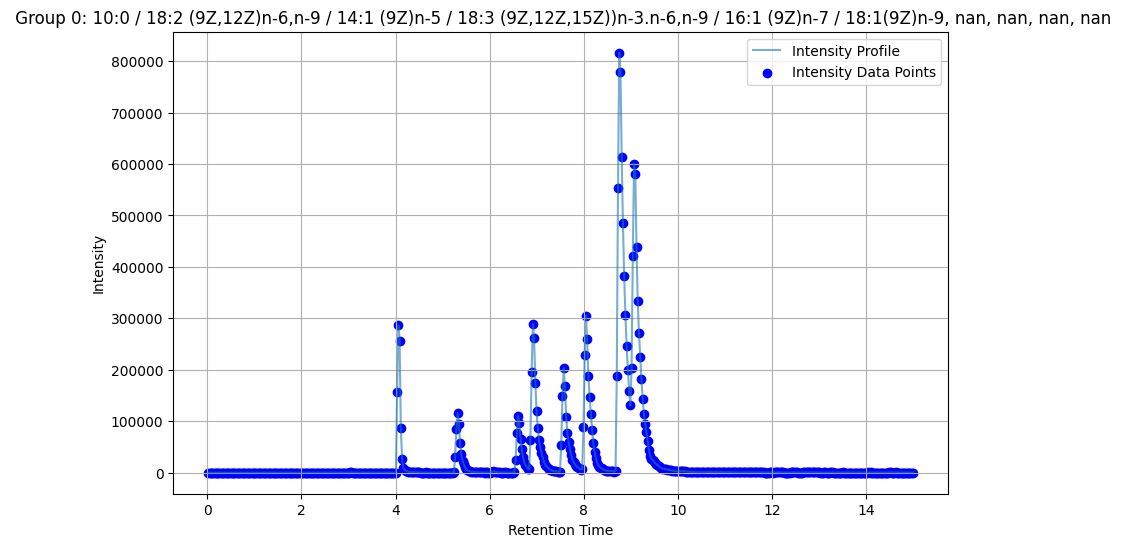

In [17]:
# Create an instance of PeakAnalysis with the output data from RawDataClass
peak_analyzer = PeakAnalysis(parsed_data)

# Plot peaks before analysis for a specific match group
peak_analyzer.plot_peaks_before(match_group=0)



In [18]:
peak_analyzer.data.columns
#parsed_data.columns

Index(['Parent_Ion', 'Product_Ion', 'Retention_Time', 'OzESI_Intensity',
       'Sample_ID', 'Transition', 'Match_Group', 'Lipid', 'Biology',
       'Genotype', 'Cage', 'Mouse', 'FAC', 'Group_Sample'],
      dtype='object')

In [19]:
# Find peaks using custom parameters
peaks = peak_analyzer.find_peaks_custom(height=5000, prominence=0.05, distance=50, width=1, wlen=10, rel_height=0.9)





In [20]:
# peak_analyzer.data
peaks

,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,FAC
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,4.059750,286286.125000,0.104933,4.007283,4.112217,4.670833,"[4.0072833333333335, 4.033516666666666, 4.0597...","[200.5600128173828, 157366.09375, 286286.125, ...","[0.019866666666666668, 0.04608333333333334, 0....","[41.20000457763672, 41.2400016784668, 41.28000...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,6.919150,289018.906250,0.131167,6.866683,6.997850,5.861190,"[6.8666833333333335, 6.892916666666667, 6.9191...","[63443.4453125, 195564.328125, 289018.90625, 2...","[0.019866666666666668, 0.04608333333333334, 0....","[41.20000457763672, 41.2400016784668, 41.28000...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
2,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,8.755467,816327.250000,0.157417,8.703000,8.860417,5.870705,"[8.703000000000001, 8.729233333333333, 8.75546...","[188222.3125, 552963.0, 816327.25, 779636.625,...","[0.019866666666666668, 0.04608333333333334, 0....","[41.20000457763672, 41.2400016784668, 41.28000...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
3,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,4.373650,231466.781250,0.104917,4.321183,4.426100,5.717891,"[4.321183333333334, 4.347416666666667, 4.37365...","[57376.54296875, 174686.1875, 231466.78125, 17...","[0.018966666666666666, 0.04518333333333333, 0....","[41.30000305175781, 41.30000305175781, 41.3000...","[11:0, 15:1, 17:1]"
4,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,6.078800,189818.093750,0.131150,6.026333,6.157483,5.945452,"[6.0263333333333335, 6.052566666666667, 6.0788...","[46655.46484375, 136257.046875, 189818.09375, ...","[0.018966666666666666, 0.04518333333333333, 0....","[41.30000305175781, 41.30000305175781, 41.3000...","[11:0, 15:1, 17:1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,46,24:1 | dummy,NaN,NaN,NaN,NaN,533.4,183.0,14.534300,27458.281250,0.314800,14.455600,14.770400,5.783267,"[14.4556, 14.481833333333334, 14.5080666666666...","[12237.7607421875, 19557.640625, 25312.2011718...","[0.0011833333333333333, 0.0274, 0.053616666666...","[41.36000442504883, 41.340003967285156, 41.340...",[24:1]
75,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.631067,91986.468750,0.104933,7.578600,7.683533,6.270951,"[7.578600000000001, 7.604833333333334, 7.63106...","[36613.40234375, 77269.46875, 91986.46875, 702...","[0.023483333333333335, 0.049716666666666666, 0...","[41.26000213623047, 41.220001220703125, 41.240...","[6:0, 20:5, 20:4, 12:1, 18:1]"
76,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.630617,105181.585938,0.131167,7.578150,7.709317,6.318573,"[7.57815, 7.604383333333334, 7.630616666666667...","[41418.8046875, 88710.265625, 105181.5859375, ...","[0.023483333333333335, 0.049716666666666666, 0...","[41.26000213623047, 41.220001220703125, 41.240...","[6:0, 20:5, 20:4, 12:1, 18:1]"
77,49,8:0 / 12:1n-5 / ... / 18:1n-11,NaN,NaN,NaN,NaN,311.3,183.0,3.615600,8187.580566,0.104933,3.563133,3.668067,5.258824,"[3.5631333333333335, 3.589366666666667, 3.6156...","[3553.020263671875, 7408.720703125, 8187.58056...","[0.021683333333333336, 0.047900000000000005, 0...","[41.26000213623047, 45.54000473022461, 44.2200...","[8:0, 12:1, 18:1]"


In [21]:
peak_analyzer.data = peaks


In [22]:
# # Plot peak and full data for all groups
# peak_analyzer.plot_peak_and_full_data(plot_all=True)

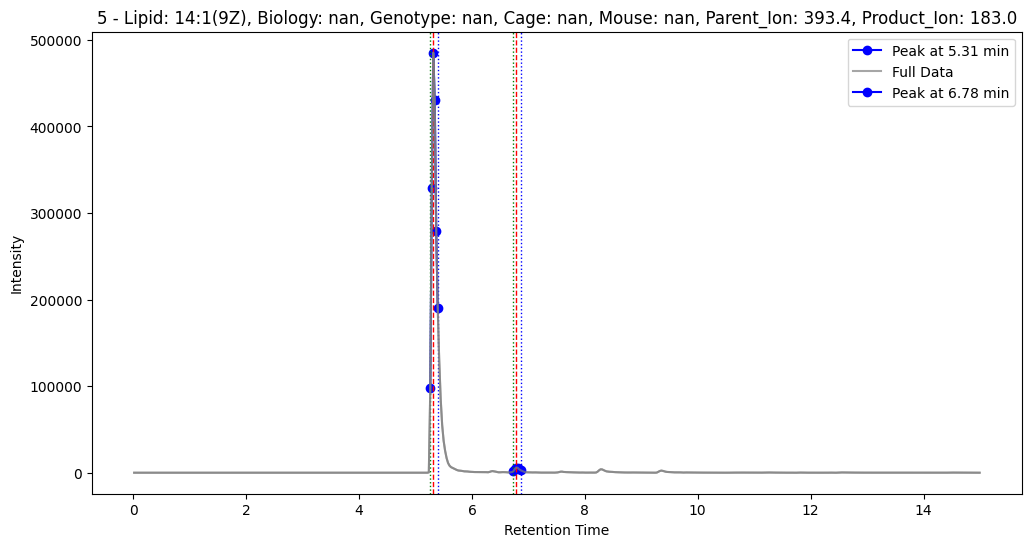

In [23]:
# Plot peak and full data for a specific group
peak_analyzer.plot_peak_and_full_data(group_sample=5)
# # To plot a specific group sample and save the plot
# peak_analyzer.plot_peak_and_full_data(group_sample=1, plot_all=True, show=False, save=True)

# Peak area

In [23]:
import numpy as np

# Function to calculate peak area for Gaussian-like peaks
def calculate_peak_area(df):
    sqrt_pi_ln2 = np.sqrt(np.pi / (4 * np.log(2)))
    df['Peak_Area'] = df['Peak_Height'] * df['FWHM'] * sqrt_pi_ln2

    loc = df.columns.get_loc('Peak_Width') + 1
    return df


import pandas as pd

def round_dataframe(df):
    # Define a helper function to handle potentially list-like entries in DataFrame cells
    def round_elements(x):
        if isinstance(x, list):  # Check if the item is a list
            return [round(item, 2) if isinstance(item, float) else item for item in x]
        elif isinstance(x, float):  # Check if the item is a float
            return round(x, 2)
        else:
            return x

    # Apply rounding to each column that contains numerical data
    for col in df.columns:
        df[col] = df[col].apply(round_elements)
    
    return df



# Apply the function to your DataFrame
d1f_v3 = calculate_peak_area(peaks)
# Assuming d1f_v2 is your DataFrame
# d1f_v2 = create_or_load_your_dataframe_function()
d1f_v4 = round_dataframe(d1f_v3)

d1f_v4


,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,FAC,Peak_Area
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,5.32,116090.37,0.10,5.27,5.37,5.95,"[5.27, 5.29, 5.32, 5.35, 5.37]","[30909.96, 85065.73, 116090.37, 94559.45, 5804...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",12967.07
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,6.92,289018.91,0.13,6.87,7.00,5.86,"[6.87, 6.89, 6.92, 6.95, 6.97, 7.0]","[63443.45, 195564.33, 289018.91, 261424.59, 17...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",40353.57
2,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,8.76,816327.25,0.16,8.70,8.86,5.87,"[8.7, 8.73, 8.76, 8.78, 8.81, 8.83, 8.86]","[188222.31, 552963.0, 816327.25, 779636.62, 61...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]",136787.75
3,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,6.08,189818.09,0.13,6.03,6.16,5.95,"[6.03, 6.05, 6.08, 6.11, 6.13, 6.16]","[46655.46, 136257.05, 189818.09, 162114.73, 10...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.34, 5.37, 5.4...","[295.48, 284.44, 339.32, 401.7, 379.6, 414.4, ...","[11:0, 15:1, 17:1]",26499.53
4,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,7.81,398123.94,0.13,7.76,7.89,5.97,"[7.76, 7.78, 7.81, 7.84, 7.86, 7.89]","[112088.45, 291033.97, 398123.94, 343383.78, 2...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.34, 5.37, 5.4...","[295.48, 284.44, 339.32, 401.7, 379.6, 414.4, ...","[11:0, 15:1, 17:1]",55587.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,42,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n-15",NaN,NaN,NaN,NaN,309.1,183.0,7.58,165001.75,0.13,7.52,7.66,5.74,"[7.52, 7.55, 7.58, 7.6, 7.63, 7.66]","[36798.7, 115778.87, 165001.75, 140199.56, 856...","[5.22, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[41.36, 41.34, 205.32, 392.62, 440.44, 295.9, ...",[22:6],23037.97
57,43,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",NaN,NaN,NaN,NaN,269.1,183.0,7.58,64931.14,0.13,7.53,7.66,5.82,"[7.53, 7.55, 7.58, 7.61, 7.63, 7.66]","[14548.56, 44982.9, 64931.14, 54201.54, 32713....","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.32, 41.34, 76.58, 108.44, 120.24, 87.28, 7...","[22:6, 12:1, 18:1]",9065.85
58,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.63,91986.47,0.10,7.58,7.68,6.27,"[7.58, 7.6, 7.63, 7.66, 7.68]","[36613.4, 77269.47, 91986.47, 70263.1, 44811.46]","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.36, 41.38, 59.68, 125.4, 143.24, 98.76, 41...","[6:0, 20:5, 20:4, 12:1, 18:1]",10274.71
59,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.63,105181.59,0.13,7.58,7.71,6.32,"[7.58, 7.6, 7.63, 7.66, 7.68, 7.71]","[41418.8, 88710.27, 105181.59, 80809.47, 53218...","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.36, 41.38, 59.68, 125.4, 143.24, 98.76, 41...","[6:0, 20:5, 20:4, 12:1, 18:1]",14685.73


In [24]:
import pandas as pd

# Assuming 'd1f_v4' is your DataFrame already loaded or defined elsewhere
# Example structure of d1f_v4 (for illustration, you should already have this DataFrame)
# d1f_v4 = pd.DataFrame({
#     'Group_Sample': [1, 2],
#     'Lipid': ['10:0 / 18:2', '11:0 / 15:1'],
#     'Peak_Height': [200, 300],
#     'Peak_Width': [0.5, 0.6],
#     'Peak_Area': [100, 150],
#     'Other_Column': [7, 8]
# })

# Step 1: Get a list of all columns
columns = list(d1f_v4.columns)

# Step 2: Remove 'Peak_Area' from the list
columns.remove('Peak_Area')

# Step 3: Find the index of 'Peak_Width'
index_of_peak_width = columns.index('Peak_Width')

# Step 4: Insert 'Peak_Area' right after 'Peak_Width'
columns.insert(index_of_peak_width + 1, 'Peak_Area')

# Step 5: Reorder the DataFrame without losing any data
d1f_v4 = d1f_v4[columns]

d1f_v4



,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Area,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,FAC
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,5.32,116090.37,0.10,5.27,5.37,5.95,12967.07,"[5.27, 5.29, 5.32, 5.35, 5.37]","[30909.96, 85065.73, 116090.37, 94559.45, 5804...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,6.92,289018.91,0.13,6.87,7.00,5.86,40353.57,"[6.87, 6.89, 6.92, 6.95, 6.97, 7.0]","[63443.45, 195564.33, 289018.91, 261424.59, 17...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
2,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,8.76,816327.25,0.16,8.70,8.86,5.87,136787.75,"[8.7, 8.73, 8.76, 8.78, 8.81, 8.83, 8.86]","[188222.31, 552963.0, 816327.25, 779636.62, 61...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
3,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,6.08,189818.09,0.13,6.03,6.16,5.95,26499.53,"[6.03, 6.05, 6.08, 6.11, 6.13, 6.16]","[46655.46, 136257.05, 189818.09, 162114.73, 10...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.34, 5.37, 5.4...","[295.48, 284.44, 339.32, 401.7, 379.6, 414.4, ...","[11:0, 15:1, 17:1]"
4,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,7.81,398123.94,0.13,7.76,7.89,5.97,55587.10,"[7.76, 7.78, 7.81, 7.84, 7.86, 7.89]","[112088.45, 291033.97, 398123.94, 343383.78, 2...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.34, 5.37, 5.4...","[295.48, 284.44, 339.32, 401.7, 379.6, 414.4, ...","[11:0, 15:1, 17:1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,42,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n-15",NaN,NaN,NaN,NaN,309.1,183.0,7.58,165001.75,0.13,7.52,7.66,5.74,23037.97,"[7.52, 7.55, 7.58, 7.6, 7.63, 7.66]","[36798.7, 115778.87, 165001.75, 140199.56, 856...","[5.22, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[41.36, 41.34, 205.32, 392.62, 440.44, 295.9, ...",[22:6]
57,43,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",NaN,NaN,NaN,NaN,269.1,183.0,7.58,64931.14,0.13,7.53,7.66,5.82,9065.85,"[7.53, 7.55, 7.58, 7.61, 7.63, 7.66]","[14548.56, 44982.9, 64931.14, 54201.54, 32713....","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.32, 41.34, 76.58, 108.44, 120.24, 87.28, 7...","[22:6, 12:1, 18:1]"
58,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.63,91986.47,0.10,7.58,7.68,6.27,10274.71,"[7.58, 7.6, 7.63, 7.66, 7.68]","[36613.4, 77269.47, 91986.47, 70263.1, 44811.46]","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.36, 41.38, 59.68, 125.4, 143.24, 98.76, 41...","[6:0, 20:5, 20:4, 12:1, 18:1]"
59,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.63,105181.59,0.13,7.58,7.71,6.32,14685.73,"[7.58, 7.6, 7.63, 7.66, 7.68, 7.71]","[41418.8, 88710.27, 105181.59, 80809.47, 53218...","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.36, 41.38, 59.68, 125.4, 143.24, 98.76, 41...","[6:0, 20:5, 20:4, 12:1, 18:1]"


In [25]:
d2 = d1f_v4.copy()
d2

,Group_Sample,Lipid,Biology,Genotype,Cage,Mouse,Parent_Ion,Product_Ion,Peak_Retention_Time,Peak_Height,FWHM,Start,Stop,Peak_Width,Peak_Area,Peak_Data_Retention_Times,Peak_Data_Intensities,Full_Data_Retention_Times,Full_Data_Intensities,FAC
0,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,5.32,116090.37,0.10,5.27,5.37,5.95,12967.07,"[5.27, 5.29, 5.32, 5.35, 5.37]","[30909.96, 85065.73, 116090.37, 94559.45, 5804...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
1,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,6.92,289018.91,0.13,6.87,7.00,5.86,40353.57,"[6.87, 6.89, 6.92, 6.95, 6.97, 7.0]","[63443.45, 195564.33, 289018.91, 261424.59, 17...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
2,0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",NaN,NaN,NaN,NaN,339.3,183.0,8.76,816327.25,0.16,8.70,8.86,5.87,136787.75,"[8.7, 8.73, 8.76, 8.78, 8.81, 8.83, 8.86]","[188222.31, 552963.0, 816327.25, 779636.62, 61...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[151.62, 476.96, 30909.96, 85065.73, 116090.37...","[10:0, 18:2, 14:1, 18:3, 16:1, 18:1]"
3,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,6.08,189818.09,0.13,6.03,6.16,5.95,26499.53,"[6.03, 6.05, 6.08, 6.11, 6.13, 6.16]","[46655.46, 136257.05, 189818.09, 162114.73, 10...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.34, 5.37, 5.4...","[295.48, 284.44, 339.32, 401.7, 379.6, 414.4, ...","[11:0, 15:1, 17:1]"
4,1,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,NaN,NaN,NaN,NaN,353.3,183.0,7.81,398123.94,0.13,7.76,7.89,5.97,55587.10,"[7.76, 7.78, 7.81, 7.84, 7.86, 7.89]","[112088.45, 291033.97, 398123.94, 343383.78, 2...","[5.21, 5.24, 5.27, 5.29, 5.32, 5.34, 5.37, 5.4...","[295.48, 284.44, 339.32, 401.7, 379.6, 414.4, ...","[11:0, 15:1, 17:1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,42,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n-15",NaN,NaN,NaN,NaN,309.1,183.0,7.58,165001.75,0.13,7.52,7.66,5.74,23037.97,"[7.52, 7.55, 7.58, 7.6, 7.63, 7.66]","[36798.7, 115778.87, 165001.75, 140199.56, 856...","[5.22, 5.24, 5.27, 5.29, 5.32, 5.35, 5.37, 5.4...","[41.36, 41.34, 205.32, 392.62, 440.44, 295.9, ...",[22:6]
57,43,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",NaN,NaN,NaN,NaN,269.1,183.0,7.58,64931.14,0.13,7.53,7.66,5.82,9065.85,"[7.53, 7.55, 7.58, 7.61, 7.63, 7.66]","[14548.56, 44982.9, 64931.14, 54201.54, 32713....","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.32, 41.34, 76.58, 108.44, 120.24, 87.28, 7...","[22:6, 12:1, 18:1]"
58,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.63,91986.47,0.10,7.58,7.68,6.27,10274.71,"[7.58, 7.6, 7.63, 7.66, 7.68]","[36613.4, 77269.47, 91986.47, 70263.1, 44811.46]","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.36, 41.38, 59.68, 125.4, 143.24, 98.76, 41...","[6:0, 20:5, 20:4, 12:1, 18:1]"
59,48,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",NaN,NaN,NaN,NaN,283.1,183.0,7.63,105181.59,0.13,7.58,7.71,6.32,14685.73,"[7.58, 7.6, 7.63, 7.66, 7.68, 7.71]","[41418.8, 88710.27, 105181.59, 80809.47, 53218...","[5.22, 5.24, 5.27, 5.3, 5.32, 5.35, 5.38, 5.4,...","[41.36, 41.38, 59.68, 125.4, 143.24, 98.76, 41...","[6:0, 20:5, 20:4, 12:1, 18:1]"


In [50]:
import pandas as pd

# Assuming 'd2' is defined and is a pandas DataFrame
columns_to_include = ['Lipid', 'Peak_Retention_Time', 'Peak_Height', 'FWHM', 'Peak_Width', 'Peak_Area']
d3 = d2[columns_to_include].copy()

# to excel
d3.to_excel('Projects/AMP/results/fame_mix/FAME_OzON.xlsx', index=False)
d3


,Lipid,Peak_Retention_Time,Peak_Height,FWHM,Peak_Width,Peak_Area
0,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",5.32,116090.37,0.10,5.95,12967.07
1,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",6.92,289018.91,0.13,5.86,40353.57
2,"10:0 / 18:2 (9Z,12Z)n-6,n-9 / 14:1 (9Z)n-5 / 1...",8.76,816327.25,0.16,5.87,136787.75
3,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,6.08,189818.09,0.13,5.95,26499.53
4,11:0 / 15:1 (10Z)n-5 / 17:1 (10Z)n-7,7.81,398123.94,0.13,5.97,55587.10
...,...,...,...,...,...,...
56,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n-15",7.58,165001.75,0.13,5.74,23037.97
57,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",7.58,64931.14,0.13,5.82,9065.85
58,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.63,91986.47,0.10,6.27,10274.71
59,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.63,105181.59,0.13,6.32,14685.73


# Plots

Plotting Class

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

class Plot:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def scatter(self):
        # Grouping the data by 'Lipid'
        grouped = self.dataframe.groupby('Lipid')

        # Creating the plot
        fig, ax = plt.subplots(figsize=(10, 6))
        for (key, group), color in zip(grouped, plt.cm.tab20.colors):
            ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)  # Using ax.scatter for clarity

        # Setting labels and title
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')

        # Setting x-tick positions and labels
        ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])  # Setting x-ticks positions
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')  # Making x-tick labels vertical

        # Adding a legend
                # Adding a legend outside the plot
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Displaying the plot
        plt.show()

    def plot_bar(self):
        # Grouping the data by 'Lipid'
        grouped = self.dataframe.groupby('Lipid')

        # Creating the plot
        fig, ax = plt.subplots(figsize=(10, 6))
        bar_width = 0.35  # Define the width of each bar
        num_groups = len(grouped.groups.keys())
        indices = list(range(num_groups))  # Creating indices for the x-axis

        # Plotting a bar for each group
        for i, (key, group) in enumerate(grouped):
            # Prepare positions for bars
            positions = [x + bar_width * i for x in indices]

            # Normalize the group to ensure all indices are covered
            normalized_peak_areas = [group[group['Lipid'] == lipid]['Peak_Area'].sum() for lipid in grouped.groups.keys()]
            ax.bar(positions, normalized_peak_areas, width=bar_width, label=str(key))

        # Adjusting x-tick positions and labels to center them under each group of bars
        ticks_positions = [i + bar_width * (num_groups / 2) - bar_width / 2 for i in indices]
        ax.set_xticks(ticks_positions)
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')  # Making x-tick labels vertical

        # Setting labels and title
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
    

        # Adding a legend
            # Adding a legend outside the plot
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Displaying the plot
        plt.show()

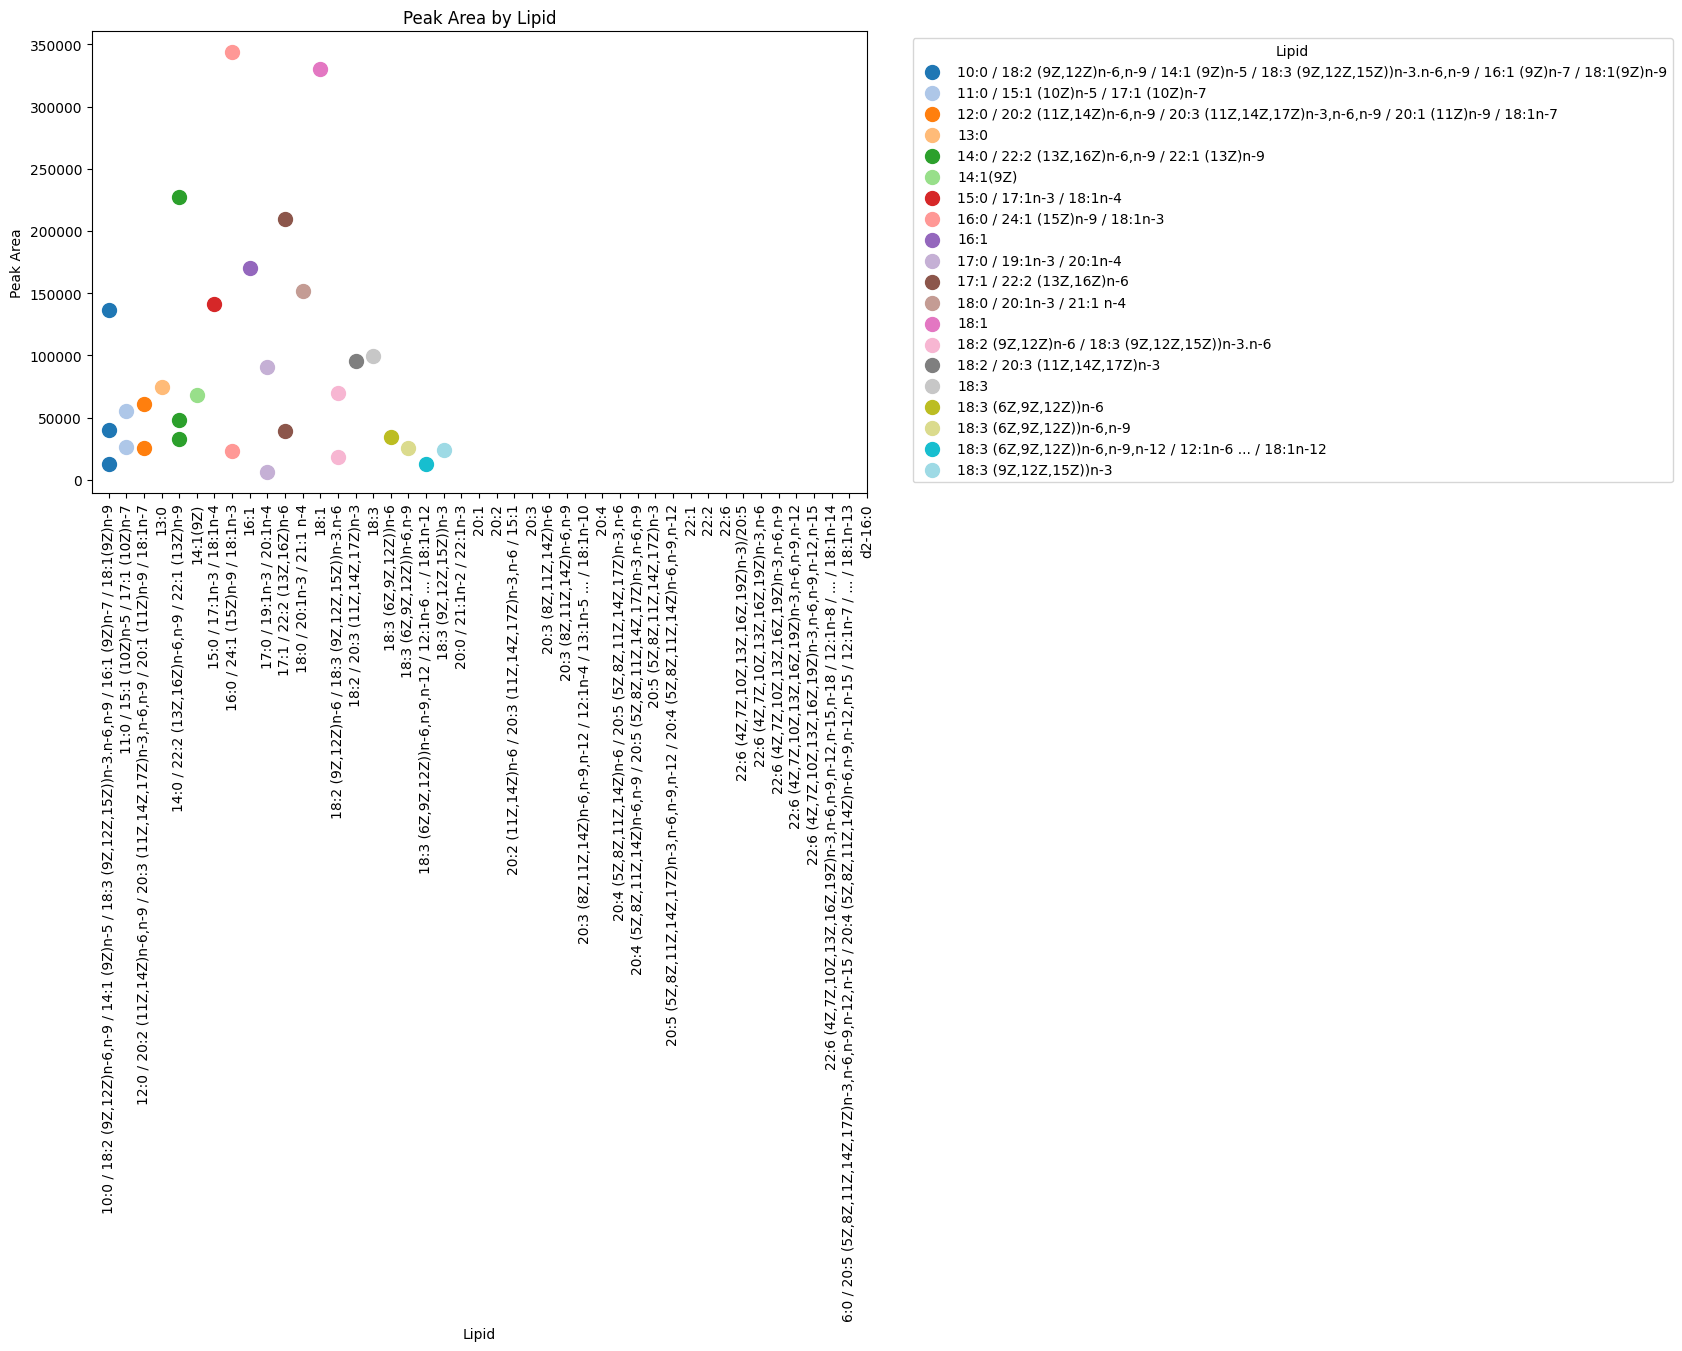

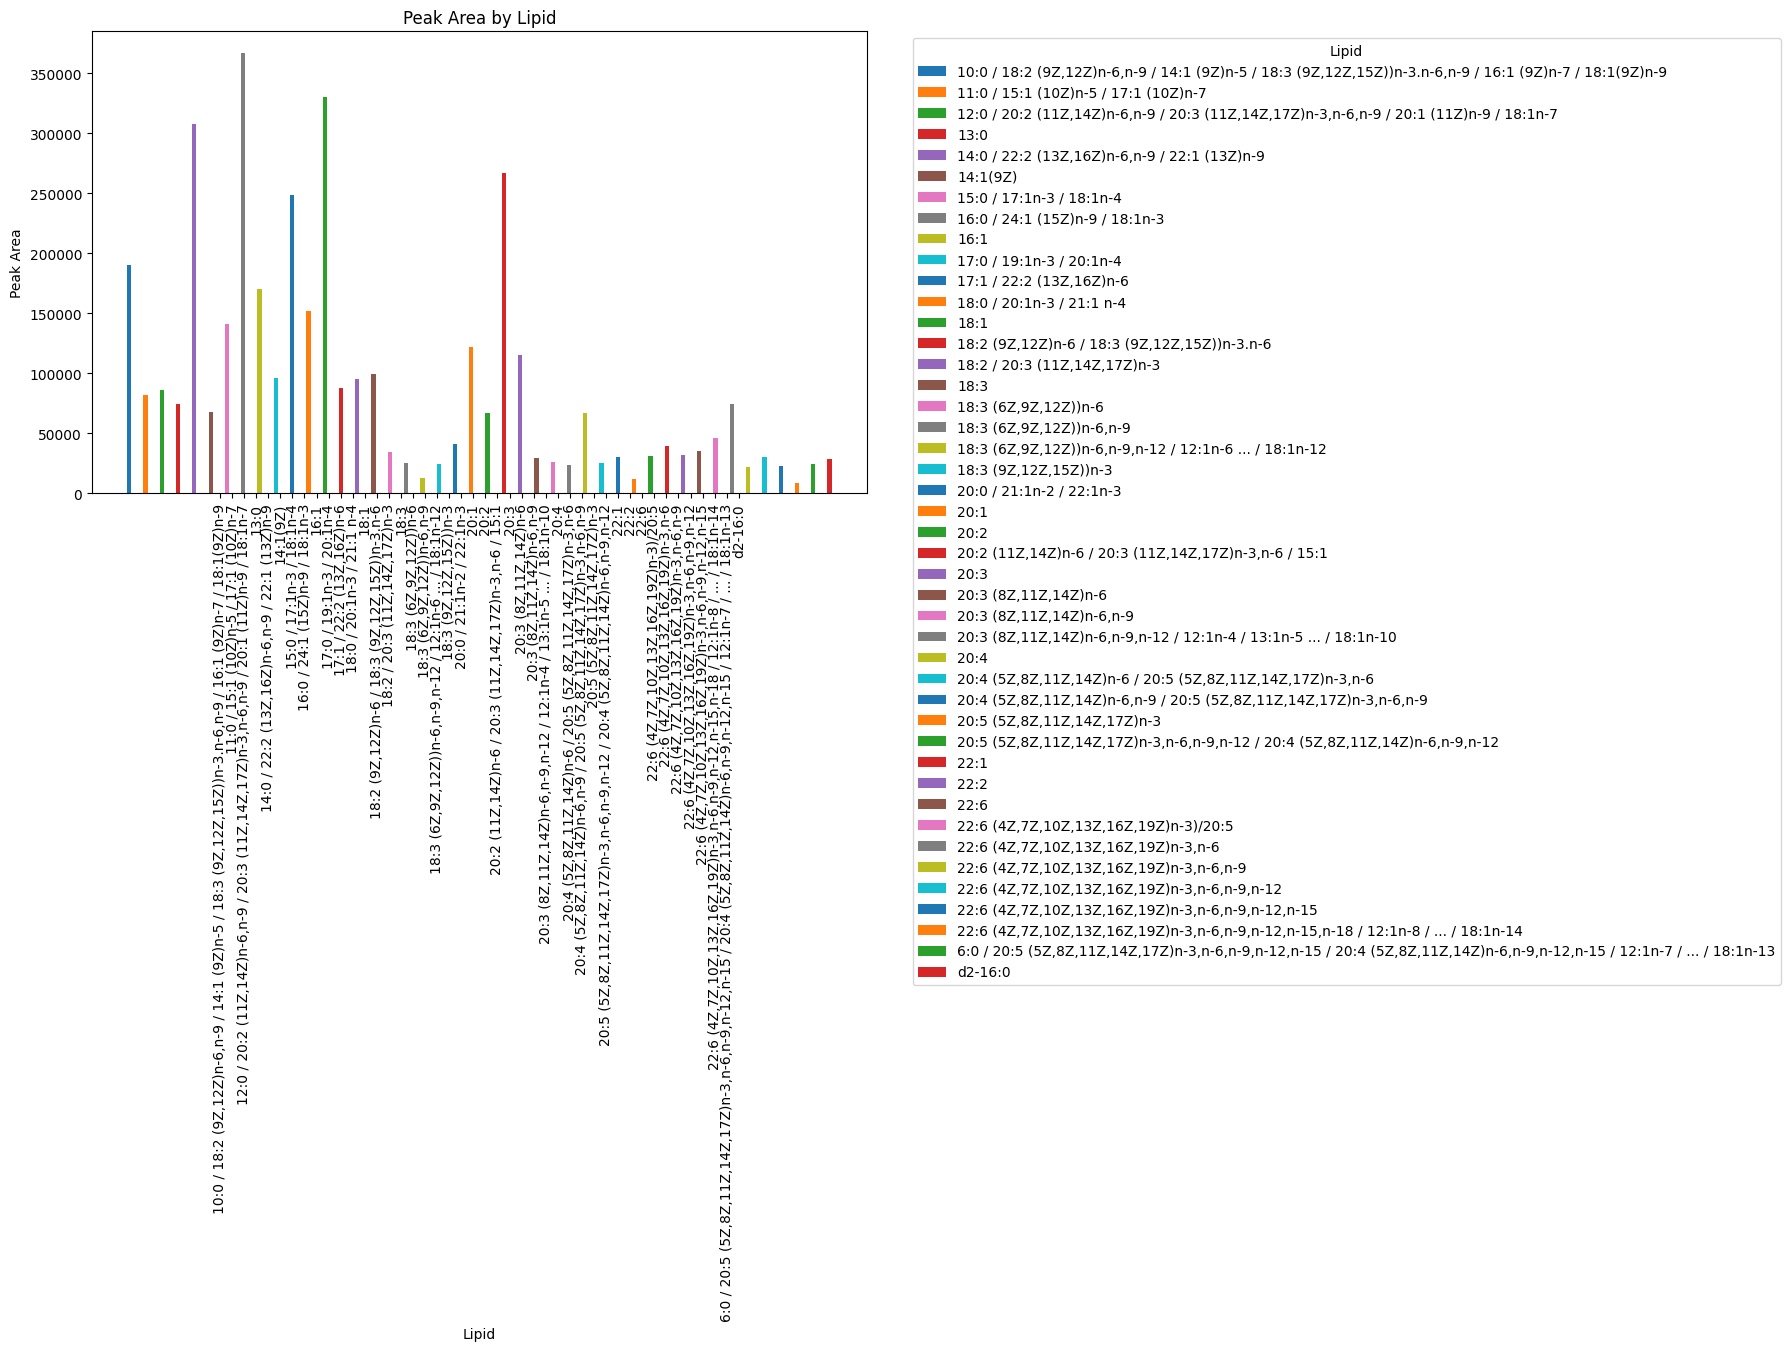

In [27]:
# Creating an instance of Plot class
plot_instance = Plot(d2)

# Calling the scatter method
plot_instance.scatter()

# Calling the plot_bar method
plot_instance.plot_bar()

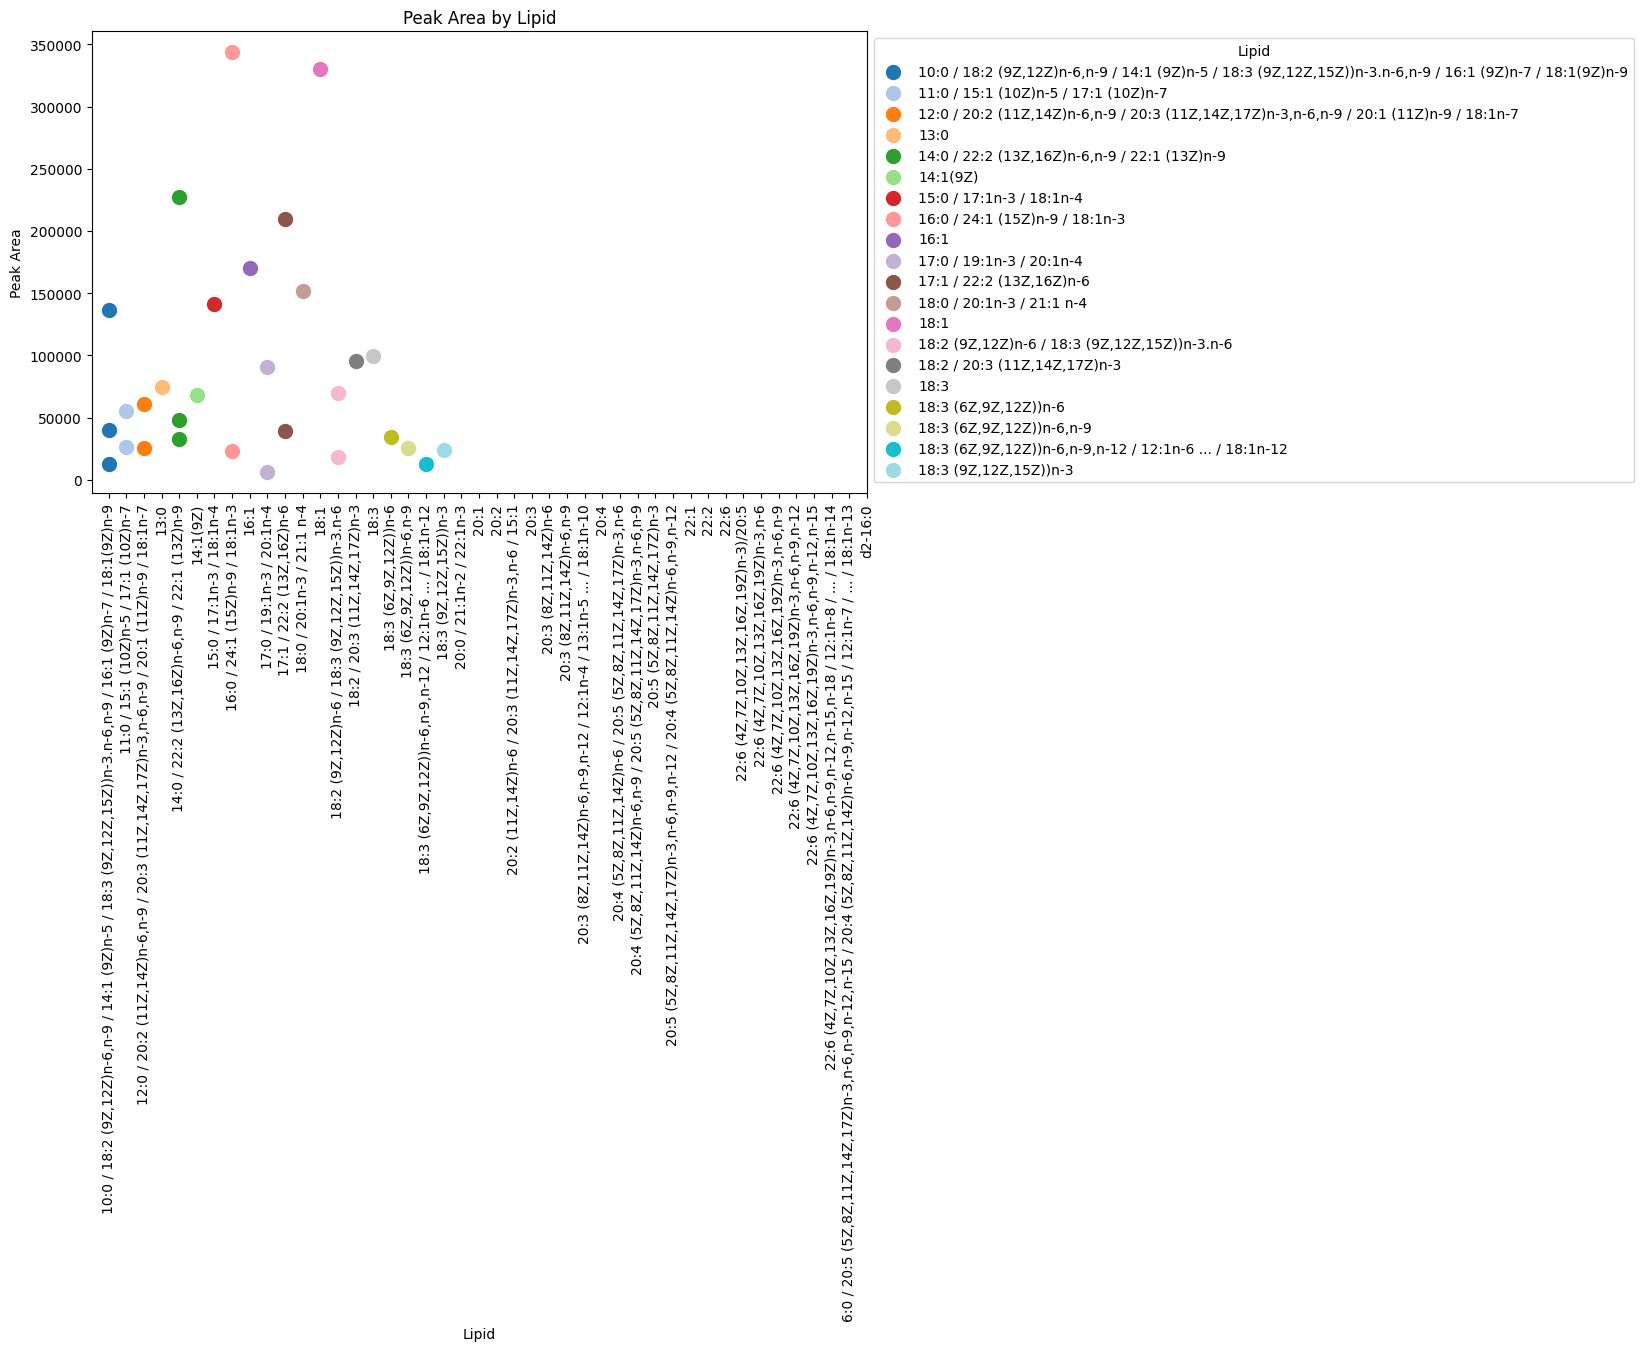

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'd2' is defined as above
grouped = d2.groupby(['Lipid'])

fig, ax = plt.subplots(figsize=(10, 6))
for (key, group), color in zip(grouped, plt.cm.tab20.colors):
    ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)  # Use ax.scatter directly for clarity

ax.set_xlabel('Lipid')
ax.set_ylabel('Peak Area')
ax.set_title('Peak Area by Lipid')

# Set the labels of the x-axis ticks to be vertical
ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])  # Setting x-ticks positions
ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')  # Setting x-ticks labels vertically

# Place the legend outside the plot on the right side
ax.legend(title='Lipid', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


# bar plots seperate

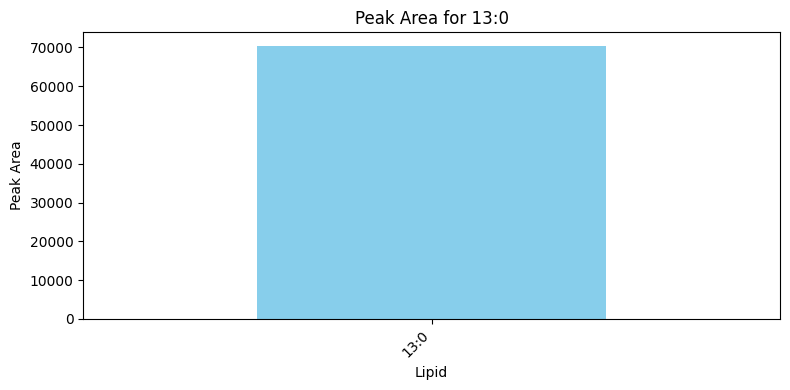

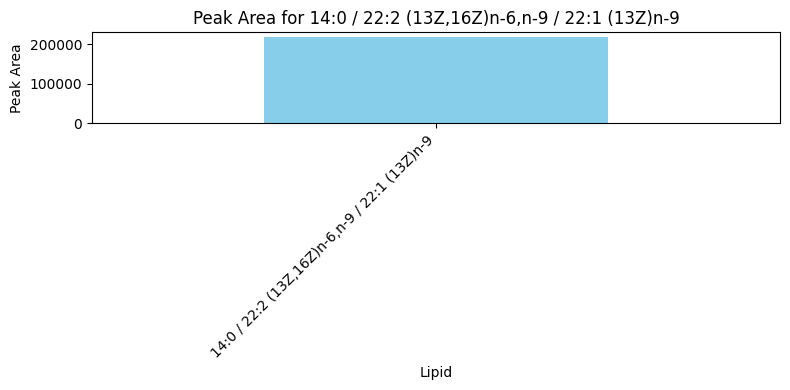

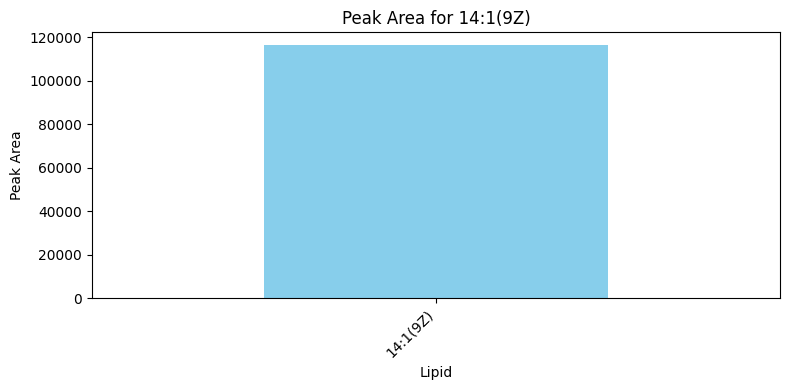

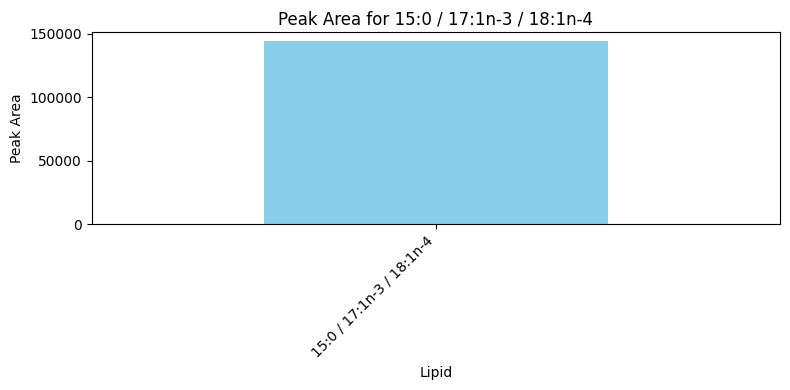

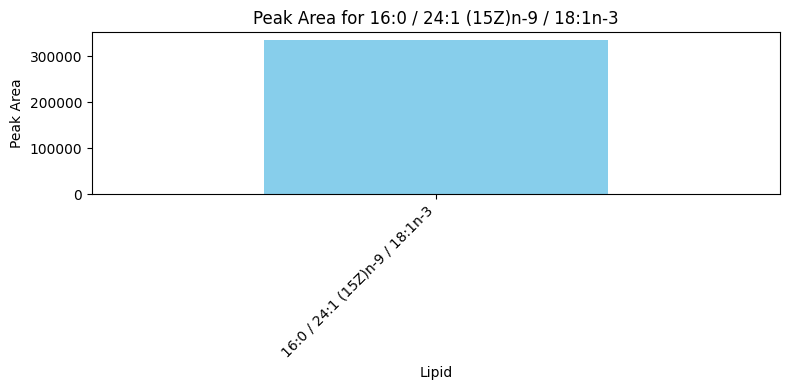

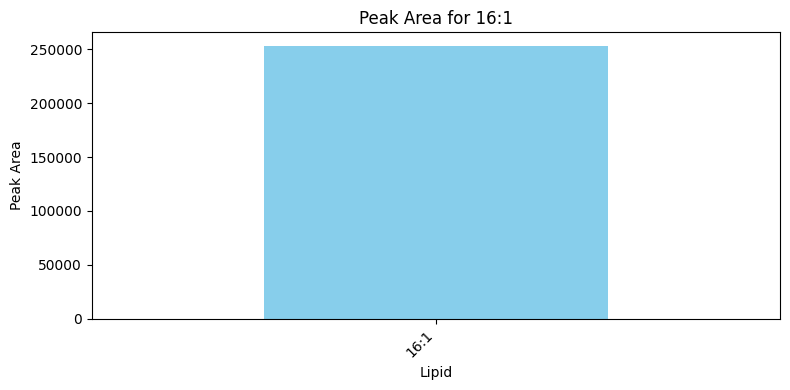

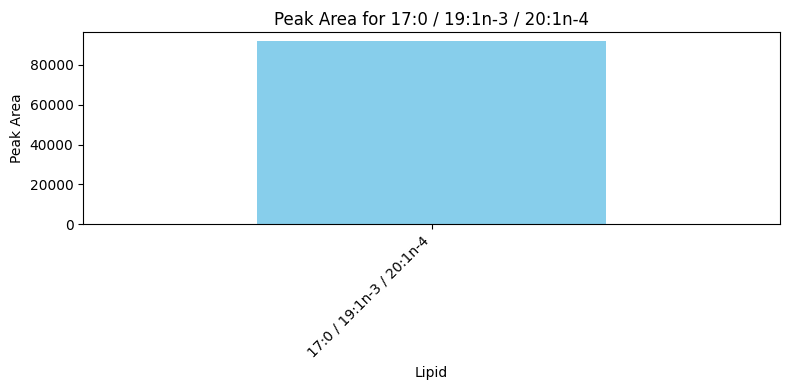

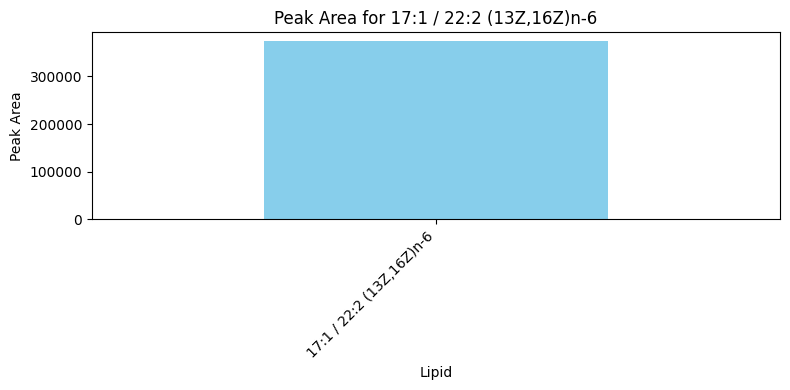

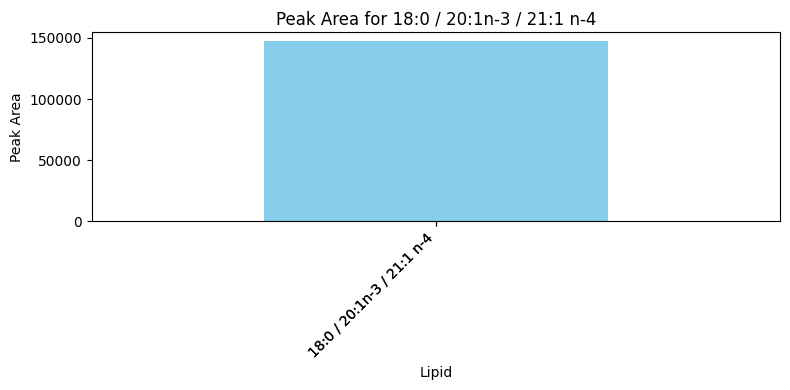

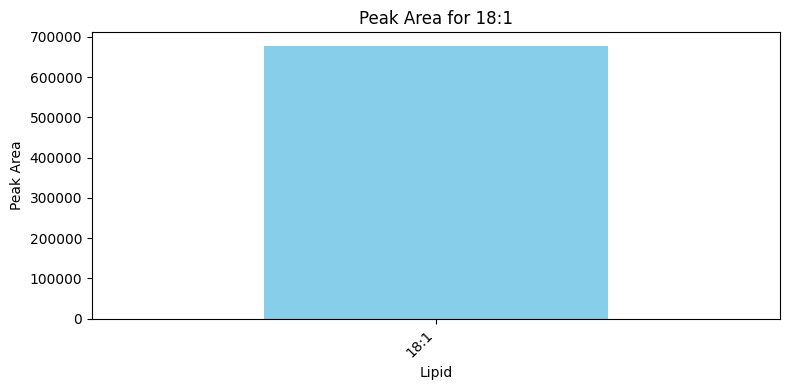

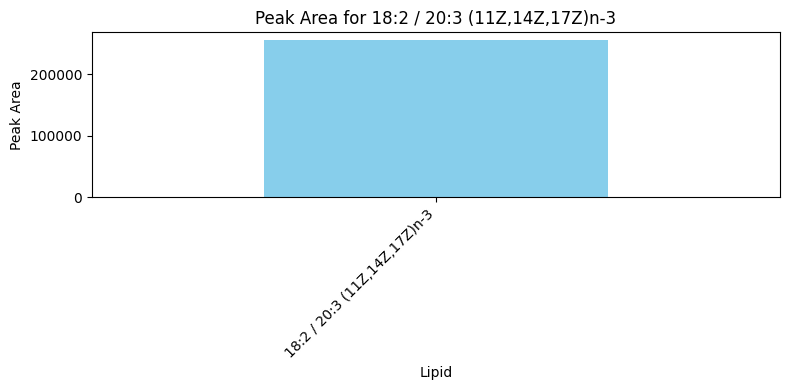

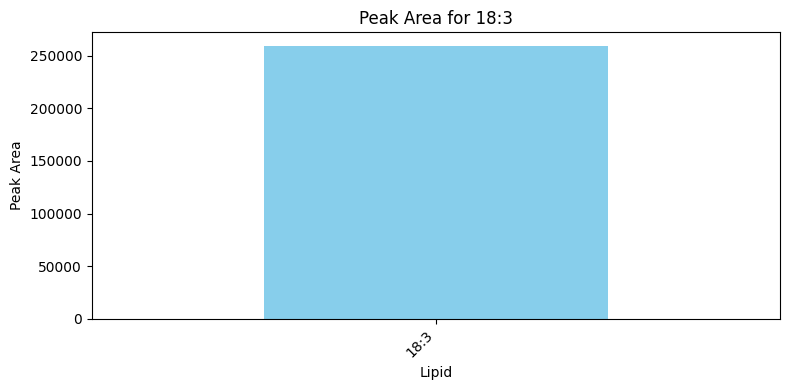

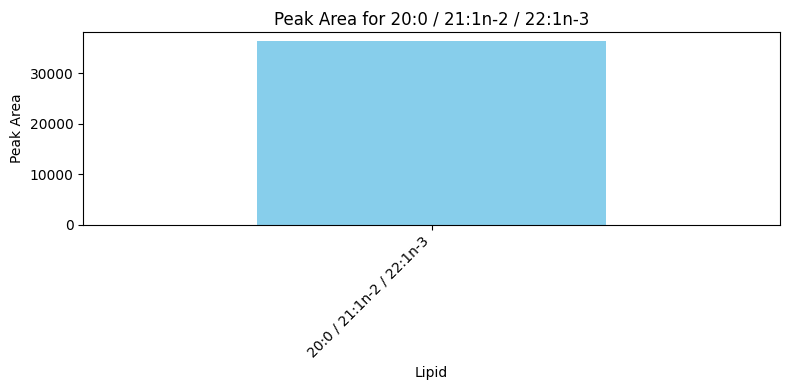

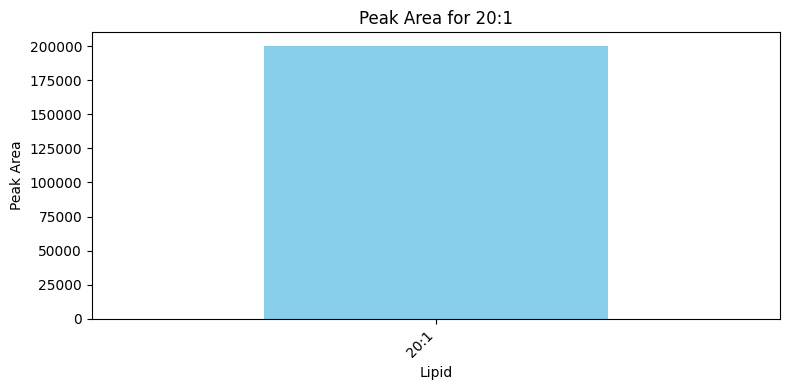

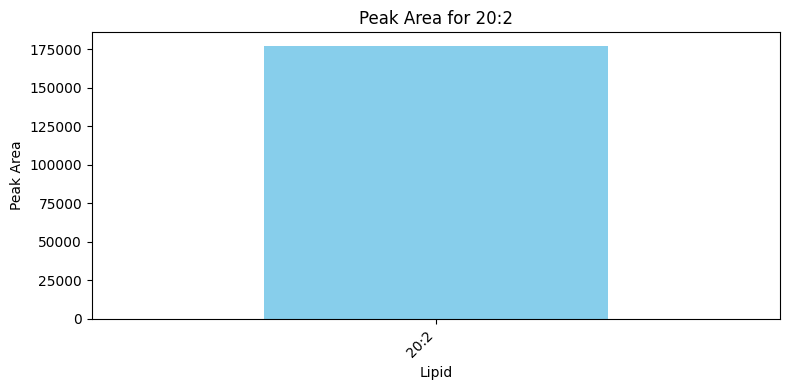

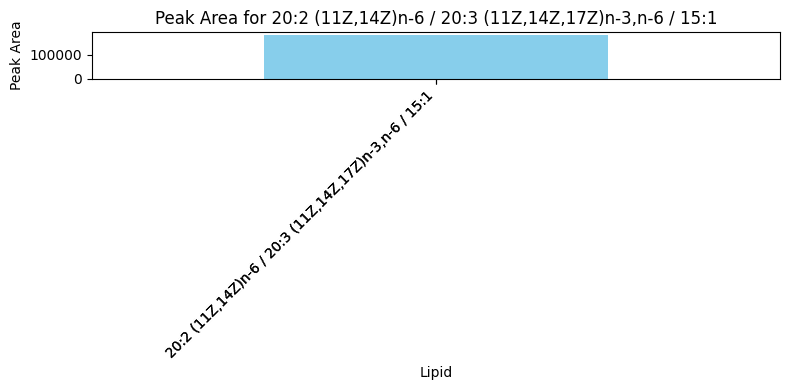

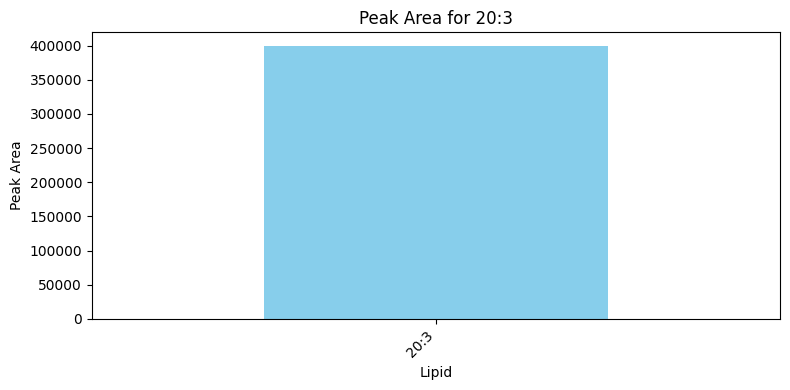

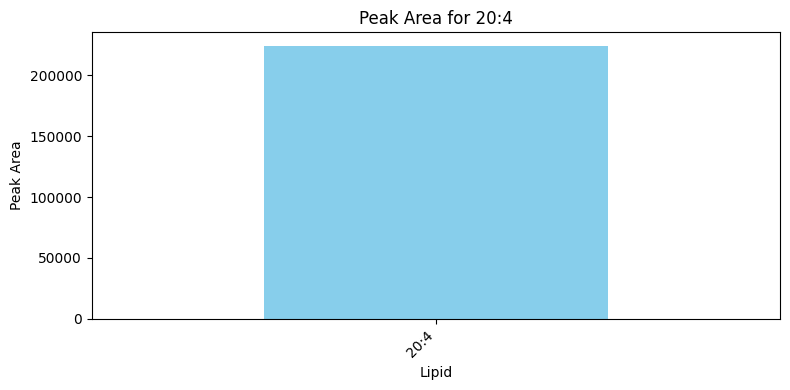

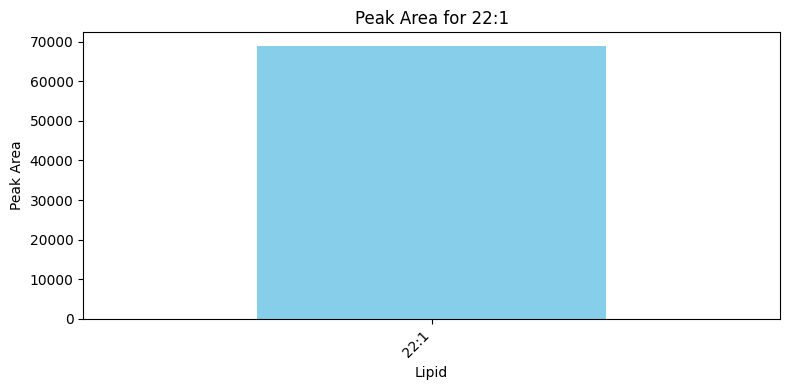

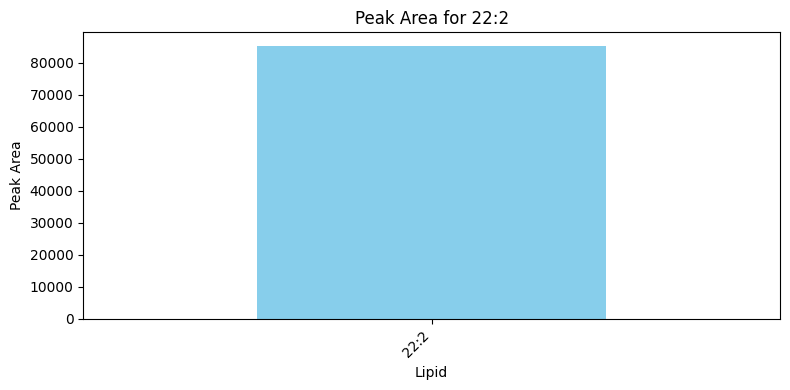

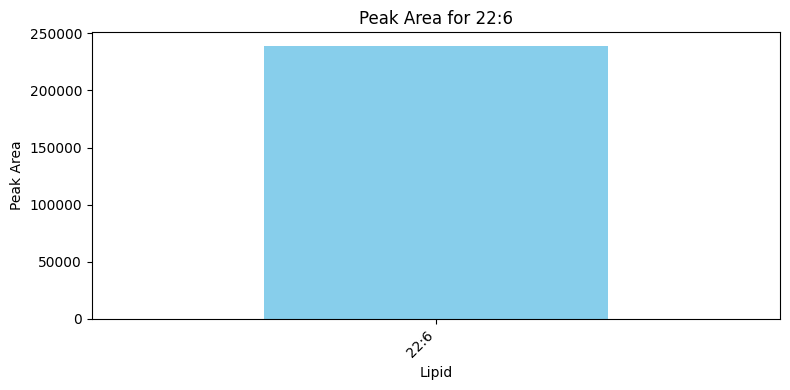

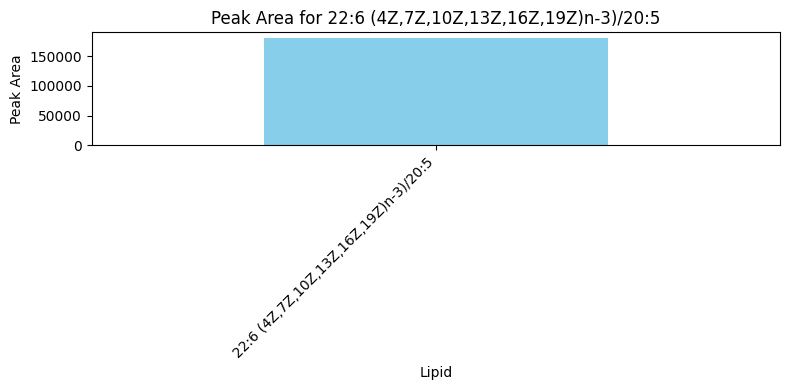

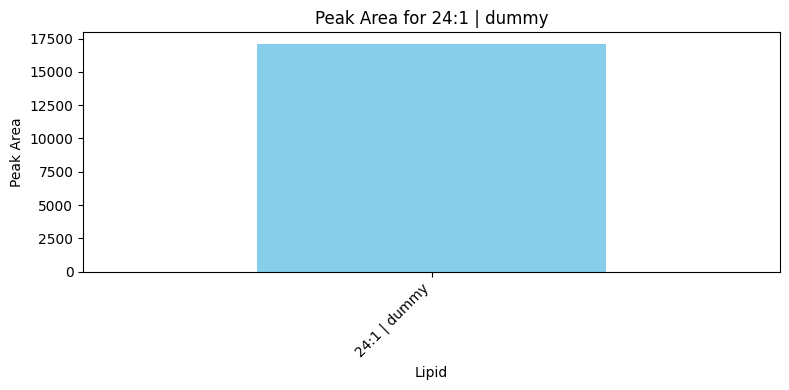

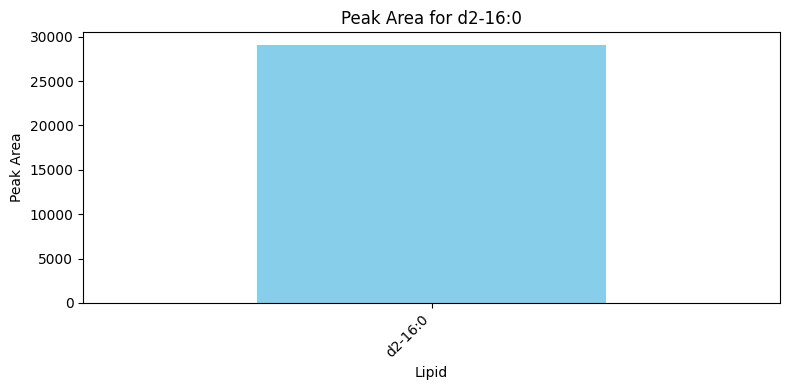

In [26]:
import matplotlib.pyplot as plt

# Assuming 'd2' is your DataFrame that has been loaded or defined previously

# Group by the combination of Biology, Genotype, Cage, and Mouse
grouped = d2.groupby(['Lipid'])

# Plotting each group separately
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(8, 4))  # Create a figure and an axes for each group.
    group.plot(kind='bar', x='Lipid', y='Peak_Area', ax=ax, legend=False, color='skyblue')
    ax.set_title(f'Peak Area for {name}')  # Set title with group details
    ax.set_xlabel('Lipid')
    ax.set_ylabel('Peak Area')
    ax.set_xticklabels(group['Lipid'], rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to make room for rotated x-labels
    plt.show()  # Display the plot


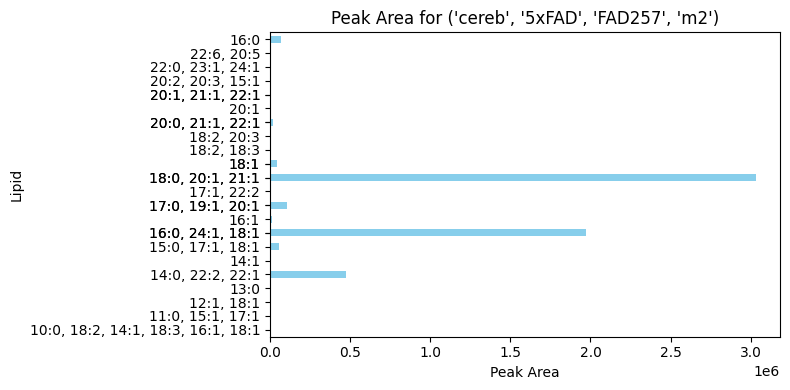

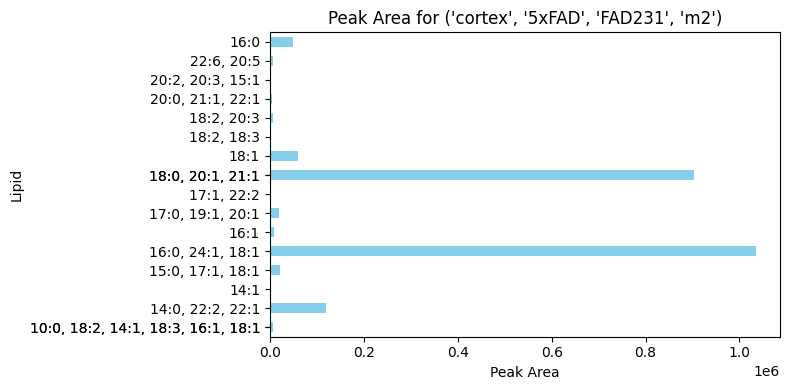

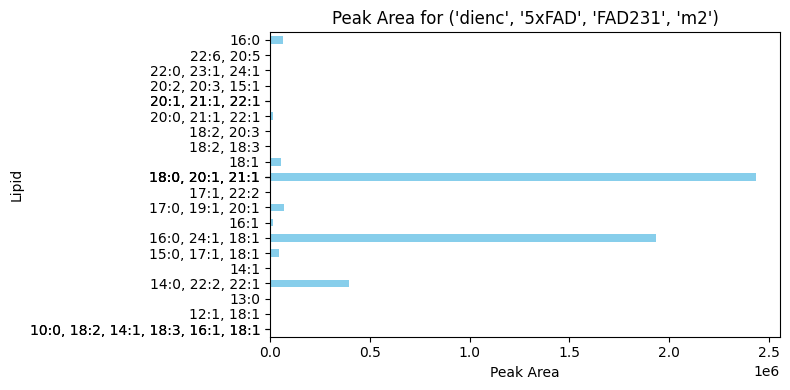

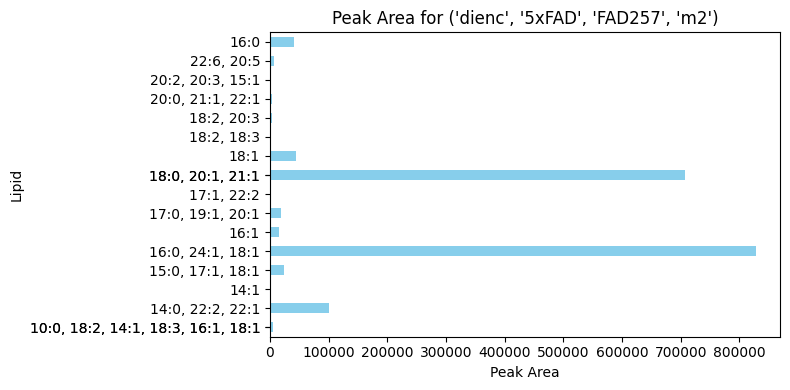

In [ ]:
import matplotlib.pyplot as plt
import re  # Import regular expression module

# Assuming 'd2' is your DataFrame that has been loaded or defined previously

# Group by the combination of Biology, Genotype, Cage, and Mouse
grouped = d2.groupby(['Biology', 'Genotype', 'Cage', 'Mouse'])

# Plotting each group separately
for name, group in grouped:
    fig, ax = plt.subplots(figsize=(8, 4))  # Create a figure and an axes for each group.
    
    # Modify lipid names to include all '##:#' formats, joining them if multiple are found
    group['Simple_Lipid'] = group['Lipid'].apply(lambda x: ', '.join(re.findall(r'\d+:\d+', x)) if re.findall(r'\d+:\d+', x) else x)

    # Plot with modified names
    group.plot(kind='barh', x='Simple_Lipid', y='Peak_Area', ax=ax, legend=False, color='skyblue')  # Horizontal bar plot
    ax.set_title(f'Peak Area for {name}')  # Set title with group details
    ax.set_ylabel('Lipid')  # Set y-axis label to 'Lipid'
    ax.set_xlabel('Peak Area')  # Set x-axis label to 'Peak Area'
    ax.set_yticklabels(group['Simple_Lipid'], rotation=0)  # Set y-tick labels without rotation

    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()  # Display the plot
